In [55]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

from sktime.utils.plotting import plot_correlations
from statsmodels.api import tsa
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error



plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,5)

### AR(p)-процесс

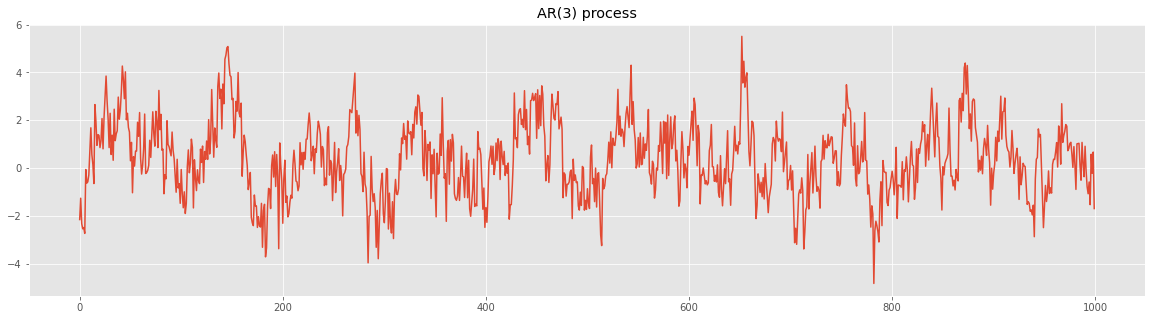

In [20]:
ma_process = tsa.ArmaProcess(ar=[1, -0.5, -0.25, -0.1])
sample = pd.Series(ma_process.generate_sample(nsample=1000, burnin = 10000))
sample.plot()
plt.title('AR(3) process');

(<Figure size 864x576 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:title={'center':'Autocorrelation'}>,
        <AxesSubplot:title={'center':'Partial Autocorrelation'}>],
       dtype=object))

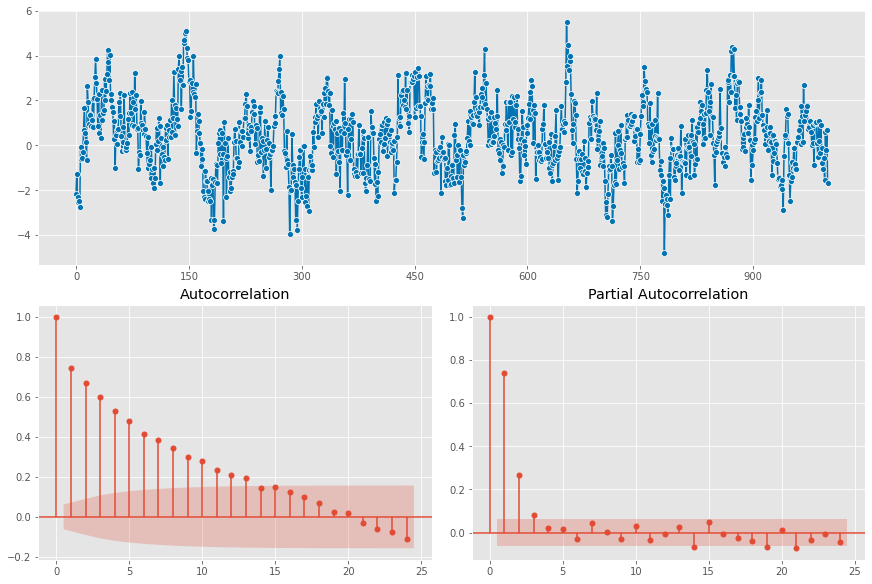

In [21]:
plot_correlations(sample)

In [22]:
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.model_selection import temporal_train_test_split

test_size = 50
train, test = temporal_train_test_split(sample, test_size = test_size)

<AxesSubplot:>

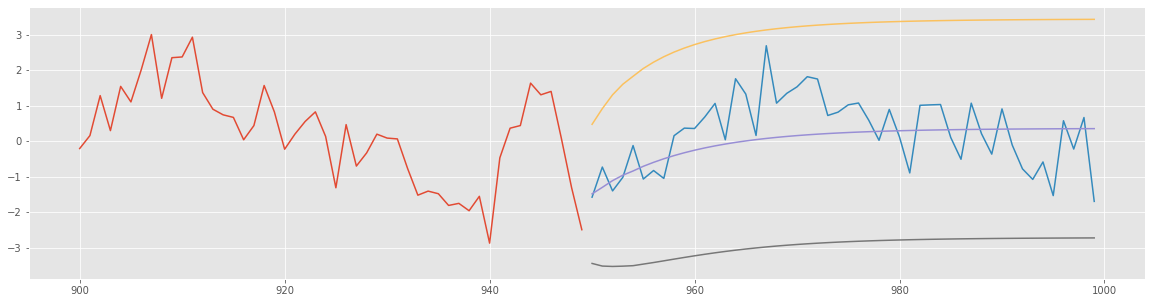

In [24]:
forecaster = ARIMA(order = (5,0,0))

forecaster.fit(train)

forecast = forecaster.predict(list(range(1, test_size+1)))
variance = forecaster.predict_interval(list(range(1, test_size+1)), coverage = 0.05)

train.tail(50).plot()
test.plot()
forecast.plot()
variance['Coverage'][0.05]['lower'].plot()
variance['Coverage'][0.05]['upper'].plot()

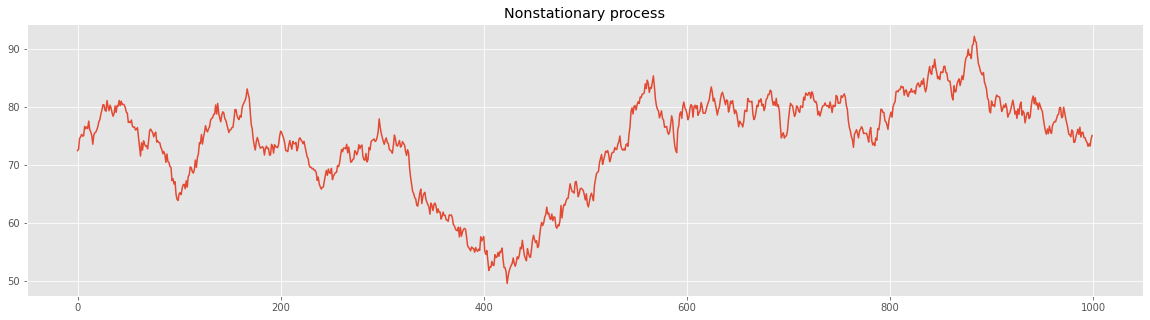

In [34]:
nonstationary_process = tsa.ArmaProcess(ar=[1, -1])
sample = pd.Series(nonstationary_process.generate_sample(nsample=1000, burnin = 10000))
sample.plot()
plt.title('Nonstationary process');


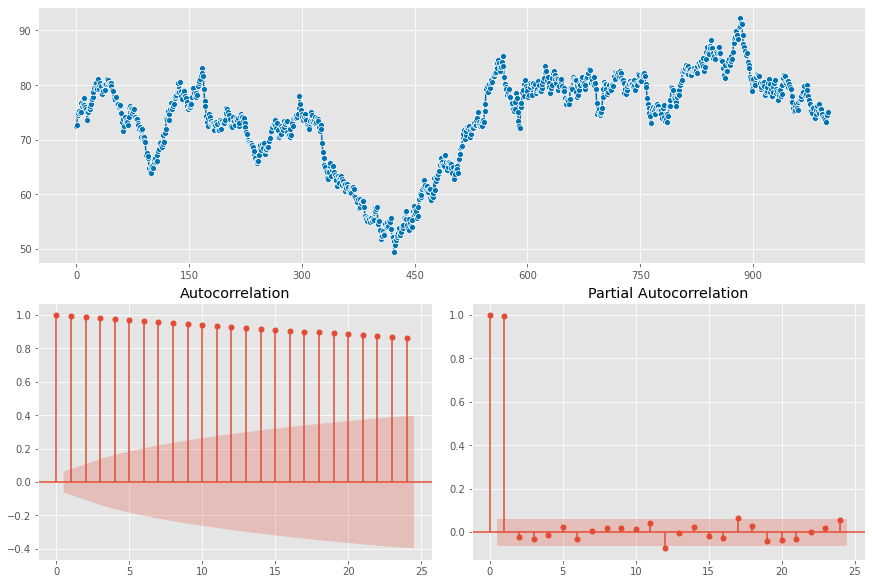

In [35]:
plot_correlations(sample);

### ARMA(p,q)-процесс

Теперь попробуем взять реальные данные и оценить характеристики некоторого ARMA(p,q)-процесса. Возьмём какой-нибудь стационарный ряд.

In [37]:
import statsmodels.api as sm
data = sm.datasets.macrodata.load_pandas().data

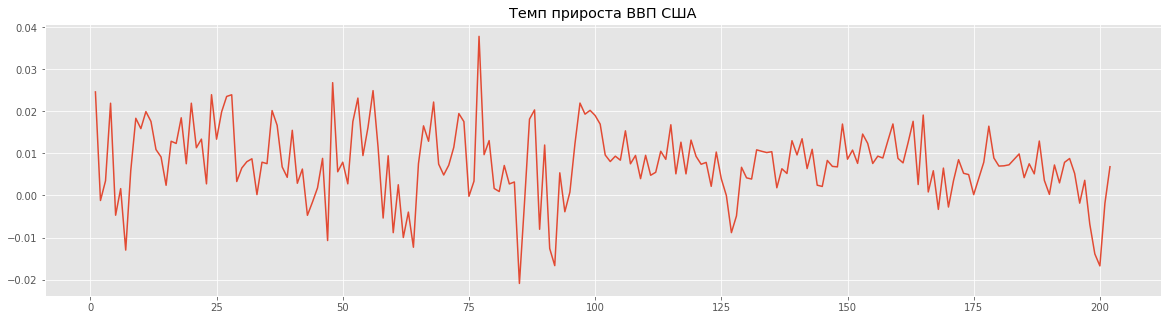

In [38]:
g_rate = (data.realgdp.diff() / data.realgdp).dropna()
g_rate.plot()
plt.title("Темп прироста ВВП США");

Посмотрим на коррелограммы

In [41]:
test_size = 20
train, test = temporal_train_test_split(g_rate, test_size = test_size)

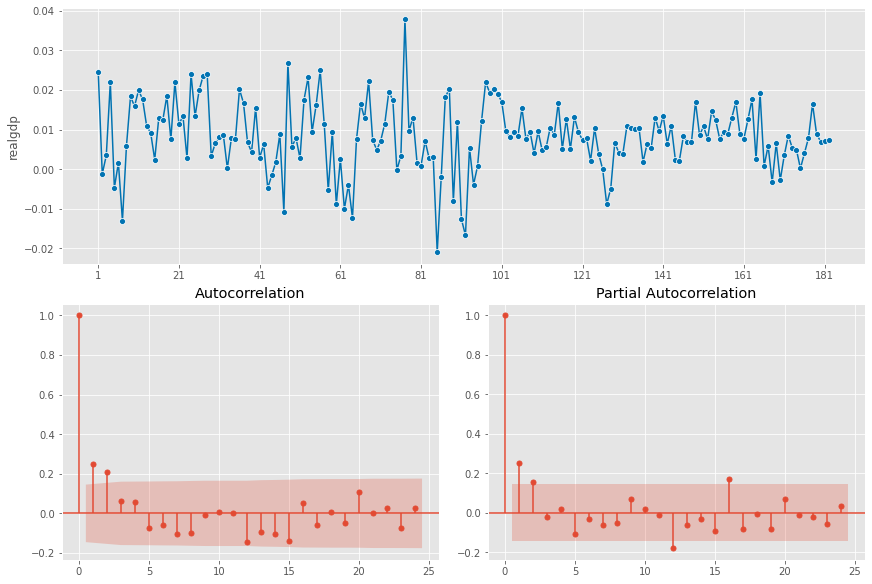

In [45]:
plot_correlations(train);

/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/the_sun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/the_sun/.local/lib/python3.8/site-packages/pmdarima/arima/arima.py:692

Forecast error: 0.8475924281051327


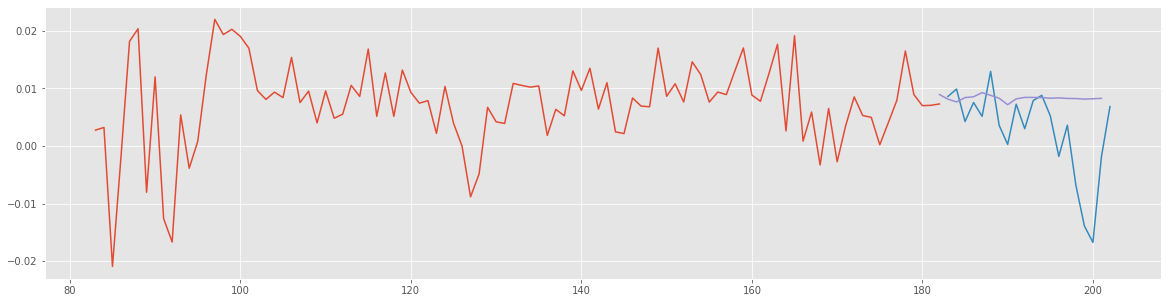

In [64]:
from sktime.forecasting.arima import AutoARIMA, ARIMA

fh = list(range(len(test)))
forecaster = AutoARIMA(stationary=True, sp=12)
forecaster.fit(train)
prediction = forecaster.predict(fh=fh)

train.tail(100).plot()
test.plot()
prediction.plot()
print(f'Forecast error: {mean_absolute_percentage_error(test, prediction)}')

In [65]:
forecaster.get_fitted_params()

{'intercept': 0.005711217533351699,
 'ar.L1': 0.21407579043700997,
 'ar.L2': 0.17592959224314694,
 'ar.S.L12': -0.13257568005557446,
 'sigma2': 6.744582765375445e-05,
 'order': (2, 0, 0),
 'seasonal_order': (1, 0, 0, 12),
 'aic': -1220.9772224120316,
 'aicc': -1220.6363133211225,
 'bic': -1204.9571889766476,
 'hqic': -1214.4829339556586}

Forecast error: 0.8592272814588643


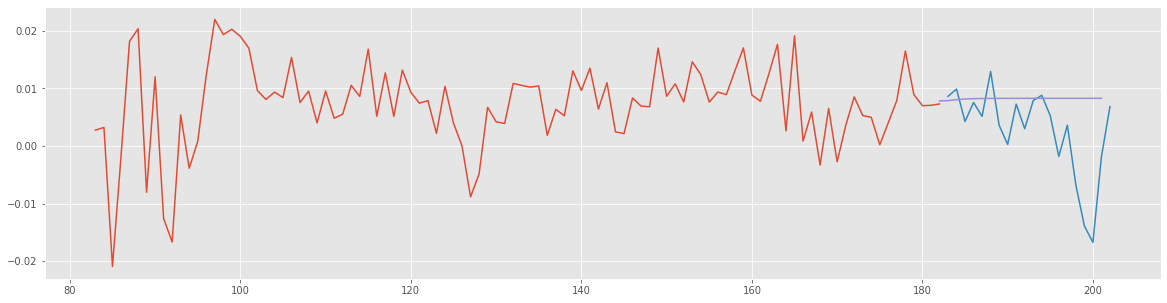

In [66]:
fh = list(range(len(test)))
forecaster = ARIMA(order=(2,0,0))
forecaster.fit(train)
prediction = forecaster.predict(fh=fh)

train.tail(100).plot()
test.plot()
prediction.plot()
print(f'Forecast error: {mean_absolute_percentage_error(test, prediction)}')